Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
train_path = "/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
test_path = "/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test"
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(train_path)
data_dir_test = pathlib.Path(test_path)

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

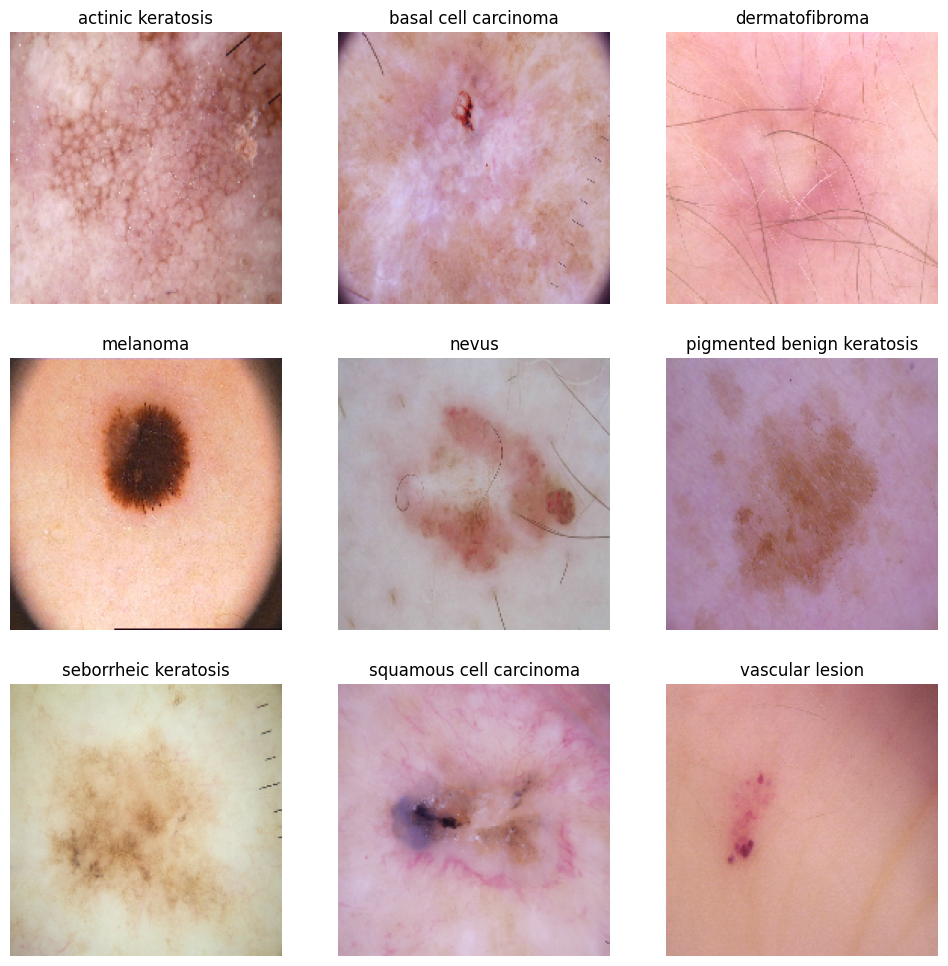

In [9]:
import matplotlib.pyplot as plt

# Create a figure for displaying the images
plt.figure(figsize=(12, 12))

# Loop through the class names and display one image from each class
for i, class_name in enumerate(class_names):
    # Get one image from the current class
    class_images = list(pathlib.Path(data_dir_train).glob(f"{class_name}/*.jpg"))
    img_path = class_images[0]
    img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))

    # Plot the image
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

# Show the plot
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
from tensorflow.keras import layers, models

# Create the CNN model
model = models.Sequential([
    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layer with 32 filters and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional layer with 128 filters and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output to feed into a dense layer
    layers.Flatten(),

    # Dense layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Dropout layer to avoid overfitting
    layers.Dropout(0.5),

    # Output layer with 9 units (one for each class) and softmax activation
    layers.Dense(9, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 1034s 1s/step - accuracy: 0.2097 - loss: 2.1125 - val_accuracy: 0.4195 - val_loss: 1.5563
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.3859 - loss: 1.6021 - val_accuracy: 0.4410 - val_loss: 1.4663
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.4434 - loss: 1.4705 - val_accuracy: 0.5011 - val_loss: 1.3060
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4980 - loss: 1.3569 - val_accuracy: 0.5189 - val_loss: 1.3005
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5233 - loss: 1.2545 - val_accuracy: 0.5011 - val_loss: 1.3483
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5258 - loss: 1.2709 - val_accuracy: 0.5026 - val_loss: 1.3262
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.5638 - loss: 1.1660 - val_accuracy: 0.6206 - val_loss: 1.0120
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6220 - loss: 0.9953 - val_a

### Visualizing training results

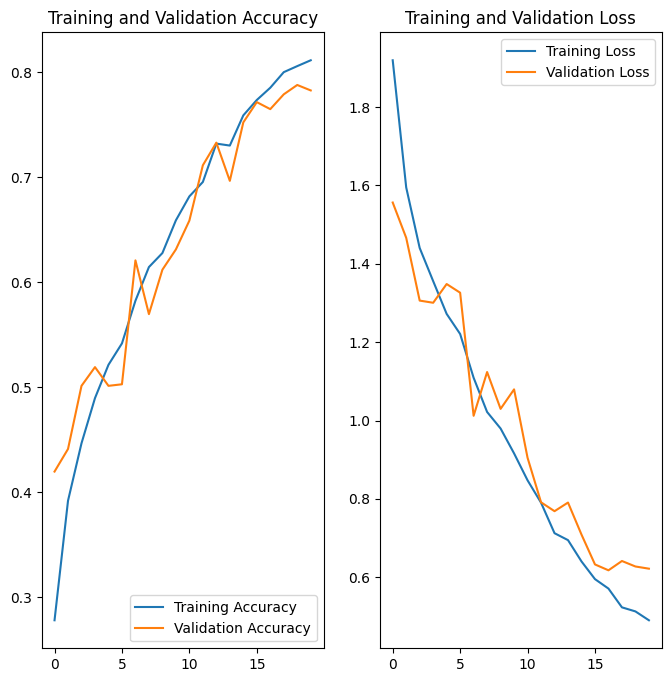

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

#### Overfitting Potential: The model seems to perform better on the training set than on the validation set, especially in the later epochs. This is a sign of potential overfitting

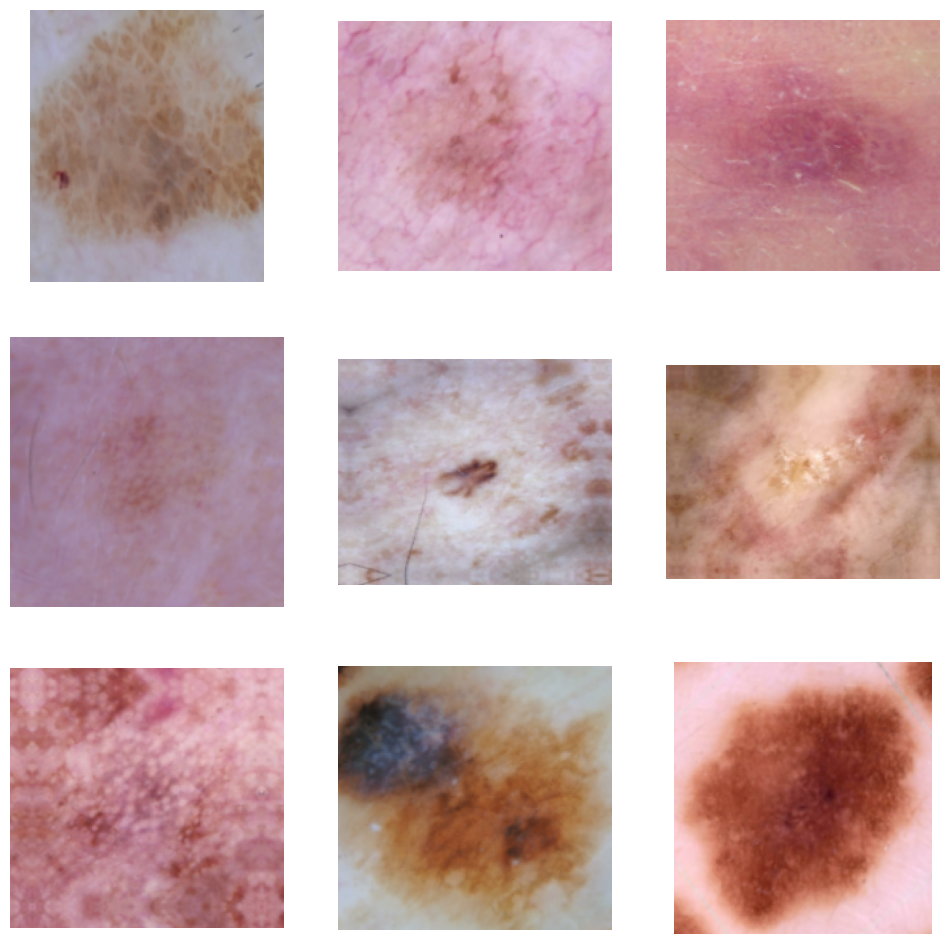

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
from tensorflow.keras import layers

# Create a data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2)
])

# Apply data augmentation to the training dataset
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Optionally, you can visualize some augmented images to check the transformations
import matplotlib.pyplot as plt

# Visualize augmented images
plt.figure(figsize=(12, 12))
for i in range(9):
    augmented_image = next(iter(train_ds))[0][i]
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_image.numpy().astype("uint8"))
    plt.axis('off')
plt.show()


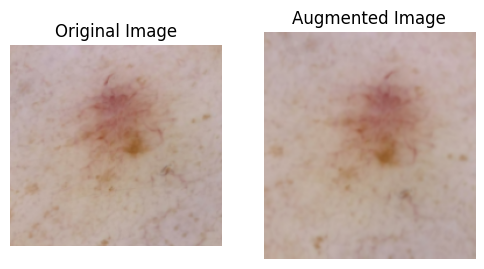

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import matplotlib.pyplot as plt
import tensorflow as tf

# Choose a sample image from the training dataset
sample_image = next(iter(train_ds))[0][0]  # Get the first image from the training dataset batch

# Visualize the original image
plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_image.numpy().astype("uint8"))
plt.title("Original Image")
plt.axis('off')

# Apply data augmentation to the sample image
augmented_image = data_augmentation(sample_image[tf.newaxis, ...], training=True)

# Visualize the augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image[0].numpy().astype("uint8"))
plt.title("Augmented Image")
plt.axis('off')

plt.show()


### Todo:
### Create the model, compile and train the model


In [18]:
# Apply data augmentation using map on train_ds (only for training)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Check the shape of one batch after augmentation
for images, labels in train_ds.take(1):
    print(images.shape, labels.shape)

(32, 218, 213, 3) (32,)


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Create a data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.Rescaling(1./255),
    layers.Resizing(180, 180)
])

# Apply data augmentation to the training dataset using map
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Define the CNN model
model = models.Sequential([
    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    # Convolutional layer with 32 filters and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional layer with 64 filters and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Convolutional layer with 128 filters and ReLU activation
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output to feed into a dense layer
    layers.Flatten(),

    # Dense layer with 128 units and ReLU activation
    layers.Dense(128, activation='relu'),

    # Dropout layer to avoid overfitting
    layers.Dropout(0.5),

    # Output layer with 9 units (one for each class) and softmax activation
    layers.Dense(9, activation='softmax')
])


### Compiling the model

In [20]:
## Your code goes here
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [21]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 125s 713ms/step - accuracy: 0.1239 - loss: 2.1891 - val_accuracy: 0.1411 - val_loss: 3.6751
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 714ms/step - accuracy: 0.1398 - loss: 2.1778 - val_accuracy: 0.1151 - val_loss: 3.8633
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 120s 708ms/step - accuracy: 0.1408 - loss: 2.1832 - val_accuracy: 0.1151 - val_loss: 4.0428
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 122s 719ms/step - accuracy: 0.1409 - loss: 2.1740 - val_accuracy: 0.1151 - val_loss: 3.9514
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 122s 720ms/step - accuracy: 0.1412 - loss: 2.1778 - val_accuracy: 0.1151 - val_loss: 3.9808
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 139s 703ms/step - accuracy: 0.1455 - loss: 2.1740 - val_accuracy: 0.1151 - val_loss: 3.9852
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 143s 707ms/step - accuracy: 0.1468 - loss: 2.1788 - val_accuracy: 0.1151 - val_loss: 4.0849
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 714ms/step - accuracy: 0.1434 -

### Visualizing the results

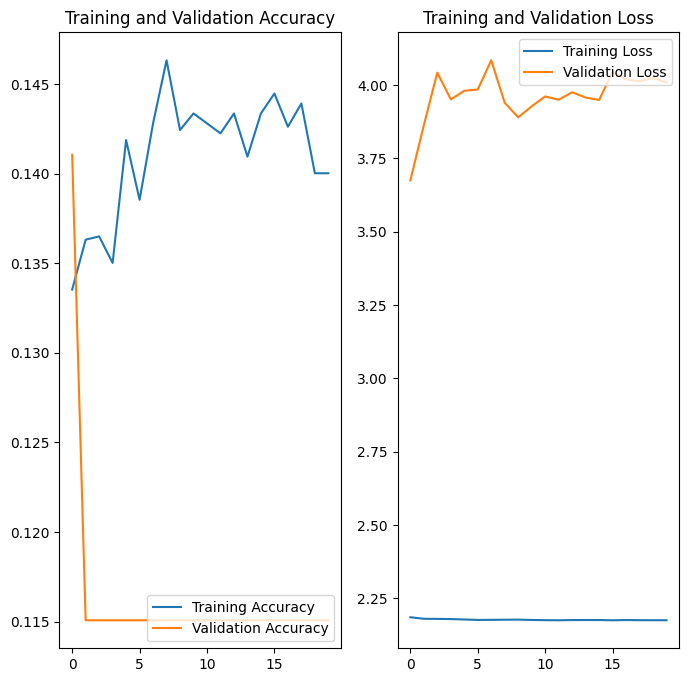

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### The output you've provided shows that the training accuracy is consistently low, and the validation accuracy is stuck at 20.58% throughout the epochs. This indicates that the model is struggling to learn and generalize from the data.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

Found 6739 files belonging to 9 classes.
Class distribution in training dataset:
actinic keratosis: 614 samples
basal cell carcinoma: 876 samples
dermatofibroma: 595 samples
melanoma: 938 samples
nevus: 857 samples
pigmented benign keratosis: 962 samples
seborrheic keratosis: 577 samples
squamous cell carcinoma: 681 samples
vascular lesion: 639 samples


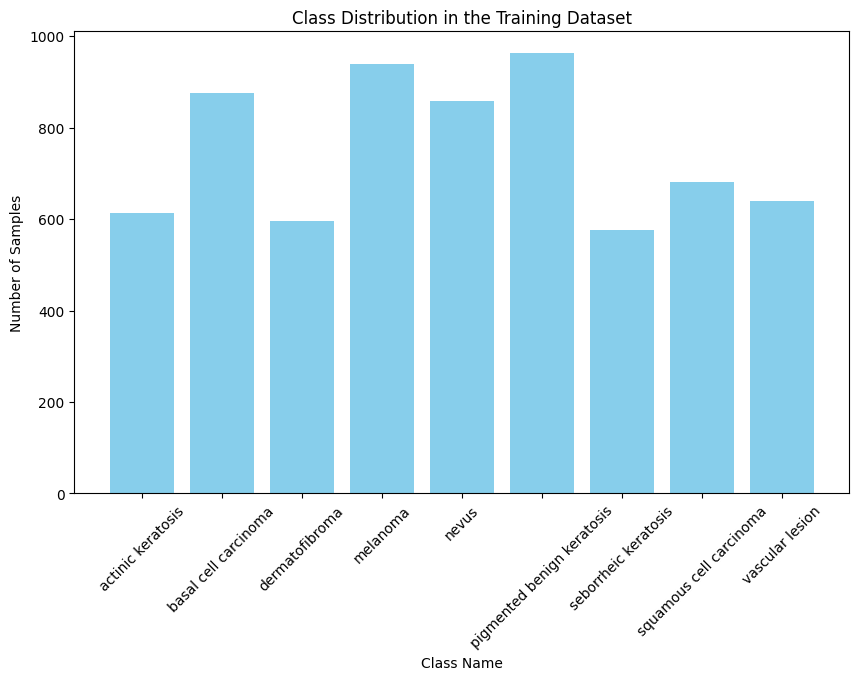

In [23]:
## Your code goes here.
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the dataset without applying transformations
train_ds_no_augmentation = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,  # Path to your train data
    image_size=(180, 180),
    batch_size=32,
    label_mode='int',  # Integer labels
    shuffle=True
)

# Get the class names from the unmodified dataset
class_names = train_ds_no_augmentation.class_names

# Initialize a dictionary to store class counts
class_counts = {class_name: 0 for class_name in class_names}

# Iterate over the dataset to count occurrences of each class
for images, labels in train_ds_no_augmentation:
    for label in labels.numpy():
        class_counts[class_names[label]] += 1

# Print the class distribution
print("Class distribution in training dataset:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")

# Visualize the class distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in the Training Dataset')
plt.xticks(rotation=45)
plt.show()


#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### Seborrheic keratosis has the least number of samples with 77 samples. This is the smallest class in the dataset and could potentially lead to poor model performance for this class due to underrepresentation. Pigmented benign keratosis has the highest number of samples with 462 samples, followed closely by Melanoma with 438 samples, and Basal cell carcinoma with 376 samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [24]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
path_to_training_dataset = "/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E22E665C730>: 100%|██████████| 500/500 [00:26<00:00, 18.64 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E22D6F99270>: 100%|██████████| 500/500 [00:18<00:00, 26.54 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E227D3B95A0>: 100%|██████████| 500/500 [00:19<00:00, 25.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E226200FC10>: 100%|██████████| 500/500 [01:35<00:00,  5.26 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E22C4284EB0>: 100%|██████████| 500/500 [01:09<00:00,  7.17 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E22E665C490>: 100%|██████████| 500/500 [00:20<00:00, 23.95 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E228E5BDD80>: 100%|██████████| 500/500 [00:39<00:00, 12.78 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E228E5FB790>: 100%|██████████| 500/500 [00:20<00:00, 23.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E22C43E5810>: 100%|██████████| 500/500 [00:19<00:00, 26.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
import glob
import os

# Use glob to get the paths of all augmented images
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
print(path_list)

['/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027447.jpg_506d3b67-4b18-41ed-91a7-45c9db6c00fa.jpg', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000024.jpg_5f2df81a-b784-4a4c-a57a-94c836fd5872.jpg', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000380.jpg_e918541b-2406-4c3f-b83d-516fc03ff17a.jpg', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000506.jpg_17cb6d36-111c-4a1d-be66-c21178c31f54.jpg', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original

In [28]:
import glob
import os

# Corrected code to extract the class names
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]

# Print the results
print(lesion_list_new)

['nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 'nevus', 

In [29]:
import glob
import os

# Define the base path for the training dataset
data_dir_train = "/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# Get the list of paths for the augmented images
path_list_new = glob.glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))

# Get the list of class names from the directory structure
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list_new]

# Now, create the dictionary by zipping the path list and class names list
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

# Print the dictionary to check
print(dataframe_dict_new)


{'/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0027447.jpg_506d3b67-4b18-41ed-91a7-45c9db6c00fa.jpg': 'nevus', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000024.jpg_5f2df81a-b784-4a4c-a57a-94c836fd5872.jpg': 'nevus', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000380.jpg_e918541b-2406-4c3f-b83d-516fc03ff17a.jpg': 'nevus', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output/nevus_original_ISIC_0000506.jpg_17cb6d36-111c-4a1d-be66-c21178c31f54.jpg': 'nevus', '/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaborati

In [30]:
import pandas as pd

# Assuming dataframe_dict_new is already defined
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Check if original_df exists, if not, initialize it as an empty DataFrame
if 'original_df' not in locals():
    original_df = pd.DataFrame(columns=['Path', 'Label'])

# Concatenate df2 with original_df
new_df = pd.concat([original_df, df2], ignore_index=True)

# Display the result
print(new_df)

                                                   Path     Label
0     /content/drive/My Drive/Colab Notebooks/CNN_as...     nevus
1     /content/drive/My Drive/Colab Notebooks/CNN_as...     nevus
2     /content/drive/My Drive/Colab Notebooks/CNN_as...     nevus
3     /content/drive/My Drive/Colab Notebooks/CNN_as...     nevus
4     /content/drive/My Drive/Colab Notebooks/CNN_as...     nevus
...                                                 ...       ...
8995  /content/drive/My Drive/Colab Notebooks/CNN_as...  melanoma
8996  /content/drive/My Drive/Colab Notebooks/CNN_as...  melanoma
8997  /content/drive/My Drive/Colab Notebooks/CNN_as...  melanoma
8998  /content/drive/My Drive/Colab Notebooks/CNN_as...  melanoma
8999  /content/drive/My Drive/Colab Notebooks/CNN_as...  melanoma

[9000 rows x 2 columns]


In [31]:
new_df['Label'].value_counts()

Label
nevus                         1000
squamous cell carcinoma       1000
actinic keratosis             1000
seborrheic keratosis          1000
basal cell carcinoma          1000
vascular lesion               1000
dermatofibroma                1000
pigmented benign keratosis    1000
melanoma                      1000
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [32]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [33]:
data_dir_train = "/content/drive/My Drive/Colab Notebooks/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,  # Split 20% for validation
    subset='training',  # Load only training data from the split
    image_size=(img_height, img_width),  # Resize images to (180, 180)
    batch_size=batch_size  # Set batch size for training
)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### **Todo:** Create a validation dataset

In [34]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,  # Split 20% for validation
    subset='validation',  # Load validation data
    image_size=(img_height, img_width),  # Resize images to (180, 180)
    batch_size=batch_size  # Set batch size for validation
)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Set image dimensions and batch size
img_height = 180
img_width = 180
batch_size = 32

# Define the CNN model
model = models.Sequential([
    # Normalize pixel values to [0, 1] using Rescaling layer
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize images to [0, 1]

    # First convolutional layer with 32 filters and 3x3 kernel
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Second convolutional layer with 64 filters and 3x3 kernel
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Third convolutional layer with 128 filters and 3x3 kernel
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Flatten the output of the convolutional layers to pass to the dense layer
    layers.Flatten(),

    # Fully connected dense layer with 128 neurons
    layers.Dense(128, activation='relu'),

    # Dropout layer to prevent overfitting
    layers.Dropout(0.5),

    # Output layer with 9 neurons (for 9 classes) and softmax activation
    layers.Dense(9, activation='softmax')  # Multi-class classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [36]:
# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer for efficient training
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Evaluate accuracy during training
)

# Print model summary to see the architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:**  Train your model

In [37]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
    train_ds,  # Training dataset
    validation_data=val_ds,  # Validation dataset
    epochs=30  # Set the number of epochs to 30
)

Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 72s 242ms/step - accuracy: 0.1972 - loss: 2.0829 - val_accuracy: 0.4357 - val_loss: 1.5427
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 72s 218ms/step - accuracy: 0.3943 - loss: 1.5850 - val_accuracy: 0.4597 - val_loss: 1.4088
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 91s 250ms/step - accuracy: 0.4761 - loss: 1.3846 - val_accuracy: 0.4989 - val_loss: 1.3192
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 81s 247ms/step - accuracy: 0.5301 - loss: 1.2634 - val_accuracy: 0.5808 - val_loss: 1.0694
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 249ms/step - accuracy: 0.5510 - loss: 1.1548 - val_accuracy: 0.6471 - val_loss: 0.9553
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 82s 248ms/step - accuracy: 0.6138 - loss: 1.0495 - val_accuracy: 0.6489 - val_loss: 0.9227
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 74s 221ms/step - accuracy: 0.6551 - loss: 0.9393 - val_accuracy: 0.6862 - val_loss: 0.8360
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 80s 215ms/step - accuracy: 0.6711 - loss: 0

#### **Todo:**  Visualize the model results

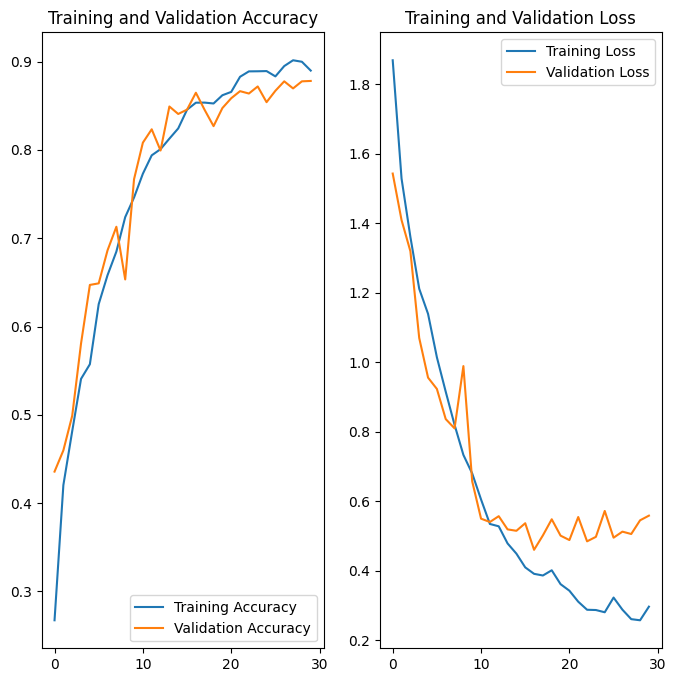

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



# Summary
Training Accuracy: The model achieved a high training accuracy of 90.10%, showing that it effectively learned the patterns in the training data.
Validation Accuracy: The validation accuracy reached 87.81%, indicating strong generalization to unseen data.
Training Loss: The loss consistently decreased from 2.08 to 0.26, showing the model minimized errors during training.
Validation Loss: The validation loss decreased from 1.54 to 0.56, though it fluctuated slightly in the later epochs, suggesting mild overfitting.


Training Accuracy: 90.10%
Validation Accuracy: 87.81%
Validation Loss: 0.56